In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns; sns.set()

In [ ]:
dt = pd.read_csv(r'bill_authentication.csv')
dt.head(20)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


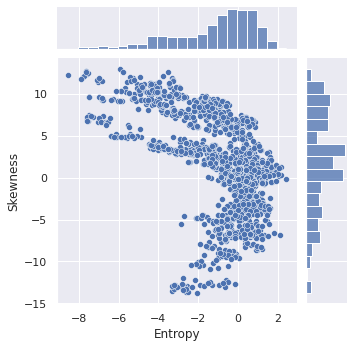

In [ ]:
#plot to show 
sns.jointplot(x="Entropy", y="Skewness", data=dt, size=5)
plt.show()

In [ ]:
dt.tail()

,Variance,Skewness,Curtosis,Entropy,Class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [ ]:
col = dt.columns

In [ ]:
dt.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:
dt.max()

Variance     6.8248
Skewness    12.9516
Curtosis    17.9274
Entropy      2.4495
Class        1.0000
dtype: float64

In [ ]:
dt.min()

Variance    -7.0421
Skewness   -13.7731
Curtosis    -5.2861
Entropy     -8.5482
Class        0.0000
dtype: float64

In [ ]:
dt['Skewness'].value_counts()

-4.45520    6
-3.26330    5
 0.70980    4
-3.79710    4
-0.02480    4
           ..
 8.81100    1
 6.40230    1
 7.27970    1
 2.10860    1
-0.65804    1
Name: Skewness, Length: 1256, dtype: int64

In [ ]:
dt['Skewness'].argmax()

126

In [ ]:
dt.iloc[dt['Skewness'].argmax()]

Variance    -2.3430
Skewness    12.9516
Curtosis     3.3285
Entropy     -5.9426
Class        0.0000
Name: 126, dtype: float64

In [ ]:
dt.iloc[:10]

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [ ]:
dt.loc[126]

Variance    -2.3430
Skewness    12.9516
Curtosis     3.3285
Entropy     -5.9426
Class        0.0000
Name: 126, dtype: float64

In [ ]:
dt.loc[dt['Skewness'] == 9.1772]

,Variance,Skewness,Curtosis,Entropy,Class
9,1.5356,9.1772,-2.2718,-0.73535,0


In [ ]:
dt.loc[dt['Skewness'] == 0]

,Variance,Skewness,Curtosis,Entropy,Class


In [ ]:
#load data 
dt = np.genfromtxt('bill_authentication.csv',delimiter = ',',skip_header = True)

input_columns = [0,1]
output_columns = [4]

#test set
X_train = dt[:80,input_columns]
Y_train = dt[:80,output_columns]

X_test = dt[:-20,input_columns]
Y_test = dt[:-20,output_columns]
print(X_train.shape)
print(X_train.shape)
print(X_test.shape)
print(Y_test.shape)

(80, 2)
(80, 2)
(1352, 2)
(1352, 1)


In [ ]:
#model KNN
model = KNeighborsClassifier(n_neighbors=3,p=2)
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
example_input = [[50,3.8]]
print(model.predict(example_input))
print(model.predict_proba(example_input))

[0.]
[[1.]]


In [ ]:
print(model.score(X_test,Y_test))

0.5636094674556213
